# HR Employee Attrition Data

What is meant by employee attrition? <br>
Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement.

Dataset : https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Disini saya akan mencoba untuk mengeksplorasi data HR-Employee-Attrition ini.<br>
Tujuan dari eksplorasi ini ialah untuk mencari tahu faktor apa saja yg menyebabkan karyawan terkena Attrition. <br>
Eksplorasi data ini akan saya lakukan dalam beberapa tahapan dan akan saya lakukan berdasarkan kelompok data. <br>
Eksplorasi awal ke target features - Attrition, lalu eksplorasi ke kelompok numerical dan terakhir ke kelompok categorical.

## FEATURE DESCRIPTIONS

Education
- 1 'Below College'
- 2 'College'
- 3 'Bachelor'
- 4 'Master'
- 5 'Doctor'

EnvironmentSatisfaction
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

JobInvolvement
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

JobSatisfaction
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

PerformanceRating
- 1 'Low'
- 2 'Good'
- 3 'Excellent'
- 4 'Outstanding'

RelationshipSatisfaction
- 1 'Low'
- 2 'Medium'
- 3 'High'
- 4 'Very High'

WorkLifeBalance
- 1 'Bad'
- 2 'Good'
- 3 'Better'
- 4 'Best'

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as ss

## OVERVIEW

> Load data terlebihdahulu

In [2]:
df = pd.read_csv("Data/HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

> Dari data diatas bisa kita lihat bahwa dataset tersebut sudah bersih, tidak ada ditemukan null values, juga data type nya sudah sesuai.

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


> Describe diatas adalah ringkasan / summary dari kolom kolom yg ada pada dataset ini. Bisa kita lihat diatas mencakup count / jumlah values, mean / rerata, standard deviation, min values, max values, and quantiles / kuartil.

> Dibawah ini ialah deskripsi pada categorical feature pada dataset. Bisa kita lihat ada count (banyak valuesnya), unique (banyak tipe kategori valuesnya), top (menampilkan kategori terbanyak dari suatu kolom), dan freq (frekuensi dari kategori yg muncul terbanyak itu)

In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


## PREPROCESSING

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


>  lanjut pengelompokkan berdasarkan data type nya.

In [10]:
df_cat = df.select_dtypes(["object"])
df_con = df.drop(columns = df_cat.columns)

In [11]:
# categorical data
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [12]:
# numerical data
df_con.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


> disini kita akan mencoba untuk menggunakan beberapa kolom yang kita perlukan saja untuk mempermudah analisa data nantinya.

In [13]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [14]:
df_con_new = df[["Age", "DistanceFromHome", "Education", "MonthlyIncome", "JobSatisfaction", "PerformanceRating", "WorkLifeBalance", "YearsInCurrentRole"]]

In [15]:
df_con_new.head()

,Age,DistanceFromHome,Education,MonthlyIncome,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsInCurrentRole
0,41,1,2,5993,4,3,1,4
1,49,8,1,5130,2,4,3,7
2,37,2,2,2090,3,3,3,0
3,33,3,4,2909,3,3,3,7
4,27,2,1,3468,2,3,3,2


In [16]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


In [17]:
df_cat_new = df[["Attrition", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]]

In [18]:
df_cat_new.head()

,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Research & Development,Medical,Male,Laboratory Technician,Married,No


> Menggunakan pd.concat() satukan semua data yang tadi terpisah

In [19]:
df_new = pd.concat([df_cat_new, df_con_new], axis = 1)

In [20]:
df_new.head()

,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DistanceFromHome,Education,MonthlyIncome,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsInCurrentRole
0,Yes,Sales,Life Sciences,Female,Sales Executive,Single,Yes,41,1,2,5993,4,3,1,4
1,No,Research & Development,Life Sciences,Male,Research Scientist,Married,No,49,8,1,5130,2,4,3,7
2,Yes,Research & Development,Other,Male,Laboratory Technician,Single,Yes,37,2,2,2090,3,3,3,0
3,No,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,33,3,4,2909,3,3,3,7
4,No,Research & Development,Medical,Male,Laboratory Technician,Married,No,27,2,1,3468,2,3,3,2


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Attrition           1470 non-null   object
 1   Department          1470 non-null   object
 2   EducationField      1470 non-null   object
 3   Gender              1470 non-null   object
 4   JobRole             1470 non-null   object
 5   MaritalStatus       1470 non-null   object
 6   OverTime            1470 non-null   object
 7   Age                 1470 non-null   int64 
 8   DistanceFromHome    1470 non-null   int64 
 9   Education           1470 non-null   int64 
 10  MonthlyIncome       1470 non-null   int64 
 11  JobSatisfaction     1470 non-null   int64 
 12  PerformanceRating   1470 non-null   int64 
 13  WorkLifeBalance     1470 non-null   int64 
 14  YearsInCurrentRole  1470 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 172.4+ KB


In [22]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsInCurrentRole,1470.0,4.229252,3.623137,0.0,2.0,3.0,7.0,18.0


In [23]:
df_new.describe(include = 'object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


> Karena semua data sudah bersih dari Null Values, dan sudah sesuai dengan tipe datanya, maka kita bisa lanjut ke EDA (Exploratory Data Analysis)

## EXPLORATORY DATA ANALYSIS

### TARGET FEATURE

> Kita akan melihat target featurenya terlebihdahulu

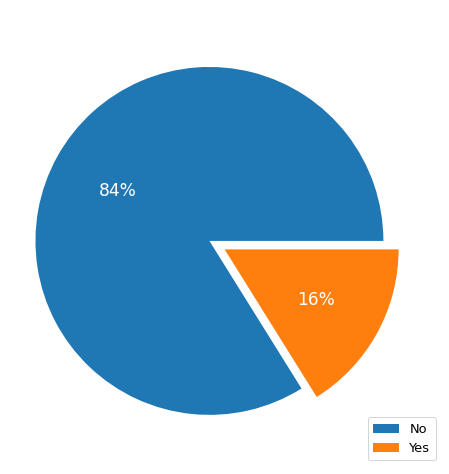

In [24]:
plt.figure(figsize = (12, 8))

plt.title('Attrition Yes or No?', size = 25, fontweight = 'bold', color = 'white')

labels = 'No', 'Yes'

plt.pie(df_new['Attrition'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

In [25]:
df_new["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

> Berdasarkan pie chart diatas, kita bisa melihat bahwa ada sekitar 16% (237) terjadinya Attrition dan 84% (1233) nya lagi tidak.

## NUMERICAL FEATURES

> Pertama-tama kita akan menganalisa terlebihdahulu korelasi dari data numerical ini.

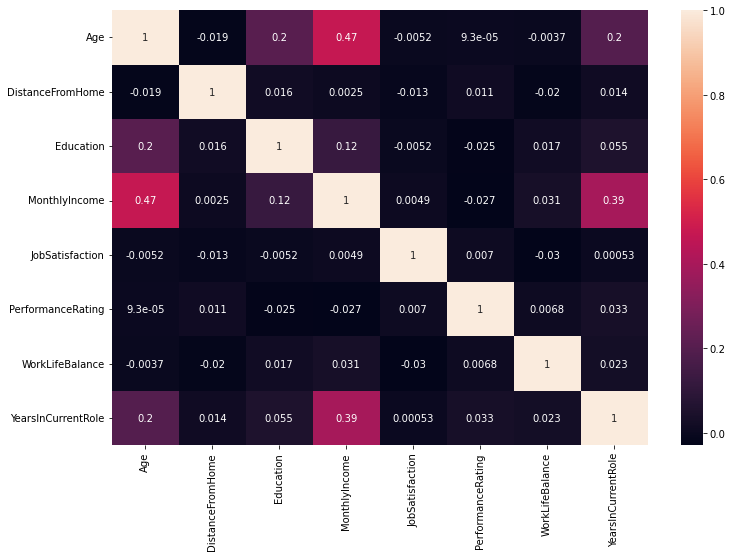

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df_con_new.corr('spearman'), annot = True)
plt.show()

> Dari heatmap diatas bisa kita lihat bahwa masih belum ada korelasi yang cukup signifikan. Adapun korelasi korelasi tersebut ialah
> - **Age dengan MonthlyIncome**
> - **MonthlyIncome dengan YearsInCurrentRole**
> - **Age dengan Education**
> - **Age dengan YearsInCurrentRole**
> - **Education dengan MonthlyIncome**

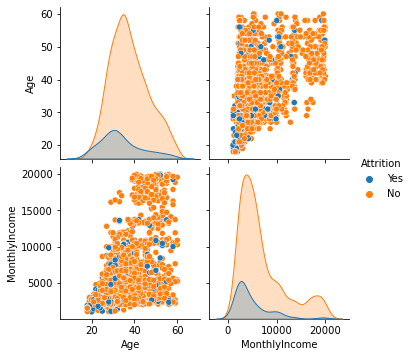

In [27]:
# Age vs MonthlyIncome
sns.pairplot(df_new[["Age", "MonthlyIncome", "Attrition"]], hue="Attrition")
plt.show()

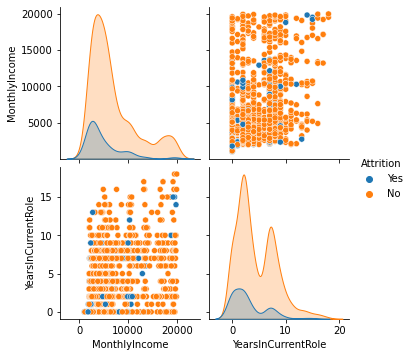

In [28]:
# MonthlyIncome vs YearsInCurrentRole
sns.pairplot(df_new[["MonthlyIncome", "YearsInCurrentRole", "Attrition"]], hue="Attrition")
plt.show()

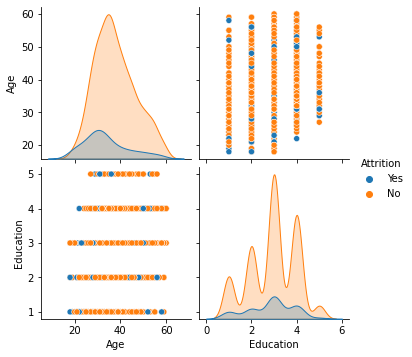

In [29]:
# Age vs Education
sns.pairplot(df_new[["Age", "Education", "Attrition"]], hue="Attrition")
plt.show()

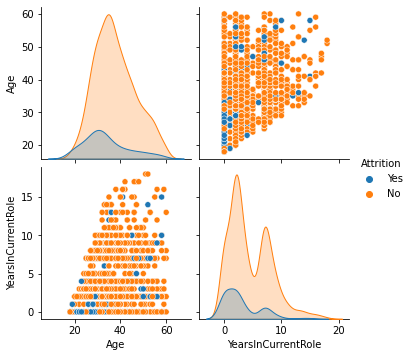

In [30]:
# Age vs YearsInCurrentRole
sns.pairplot(df_new[["Age", "YearsInCurrentRole", "Attrition"]], hue="Attrition")
plt.show()

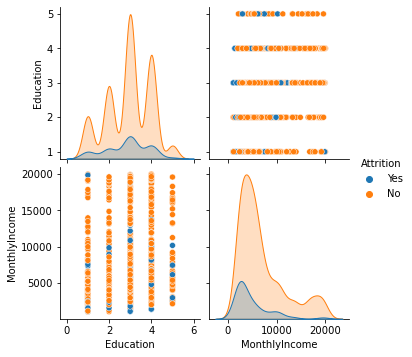

In [31]:
# Education vs MonthlyIncome
sns.pairplot(df_new[["Education", "MonthlyIncome", "Attrition"]], hue="Attrition")
plt.show()

> Berdasarkan pairplot diatas bisa kita lihat bahwa pola penyebarannya masih belum mengikuti linear relationship (hubungan positif dan negatif).

> Selanjutnya kita akan mencoba untuk melihat distribusi Attritionnya

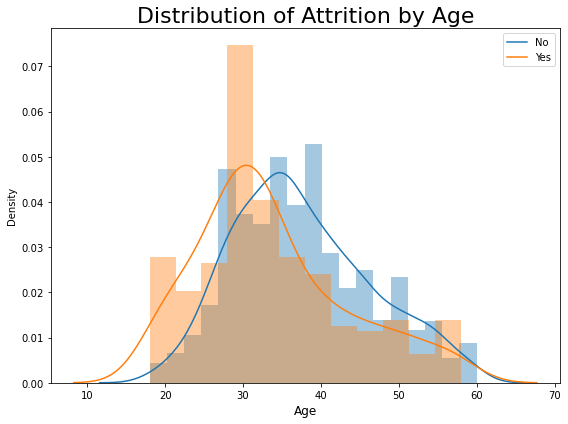

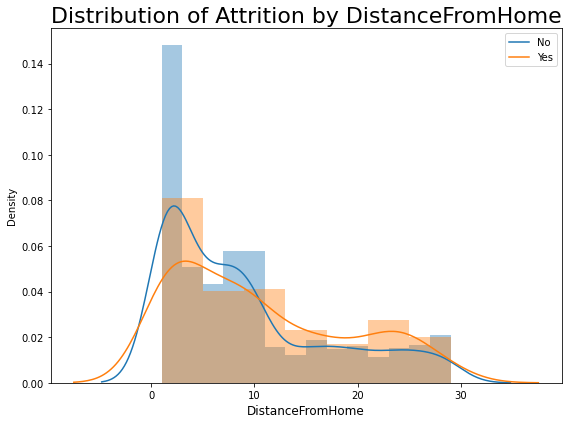

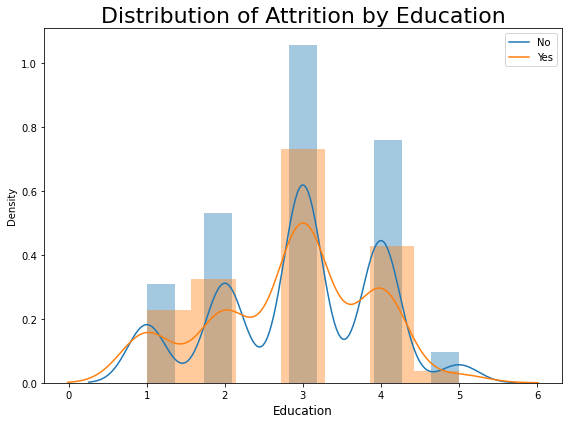

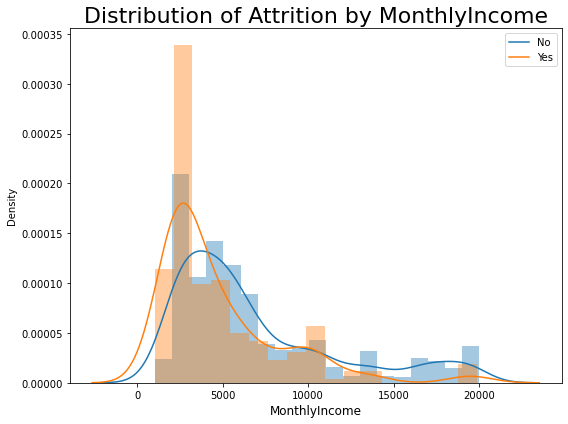

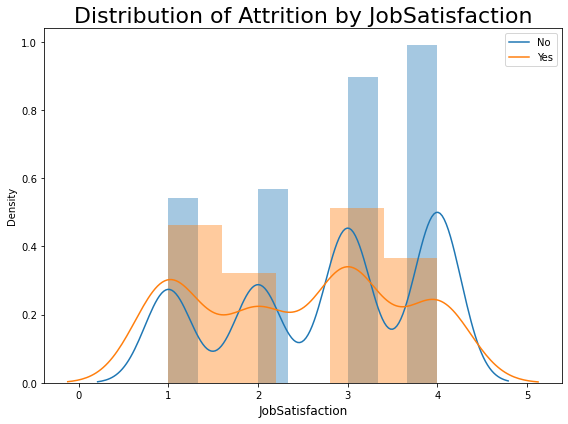

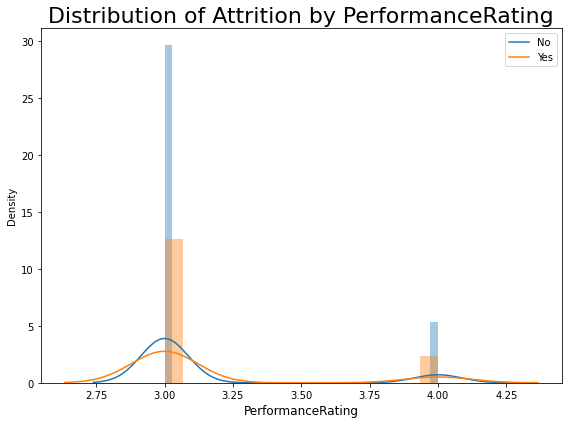

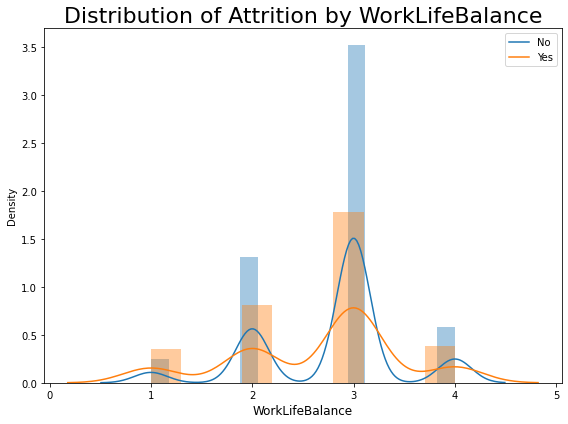

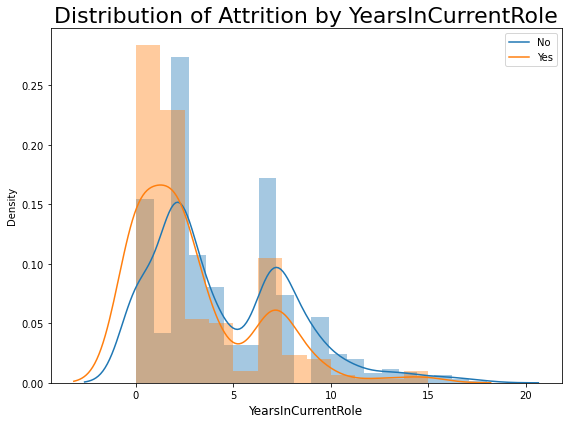

In [32]:
for i in df_con_new.columns:
    plt.figure(figsize = (8,6))
    ax = sns.distplot(df_new[(df_new['Attrition'] == 'No')][i])
    ax = sns.distplot(df_new[(df_new['Attrition'] == 'Yes')][i])
    
    ax.legend(['No', 'Yes'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of Attrition by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

> Kita akan coba mengeksplor lebih rinci terkait informasi dari distribusi plot diatas

> - The Age, pada Age ini terlihat karyawan yg terkena Attrition ataupun tidak itu cukup bervariasi mulai dari umur 26 - 40 tahun dan masih belum terlihat perbedaan yang cukup signifikan diantara kedua kategori tersebut.

In [33]:
df_con['Age'][df_new['Attrition']=='Yes'].value_counts().head()

31    18
29    18
28    14
33    12
26    12
Name: Age, dtype: int64

In [34]:
df_con['Age'][df_new['Attrition']=='No'].value_counts().head()

34    68
35    68
36    63
38    56
40    52
Name: Age, dtype: int64

> - The DistanceFromHome, untuk jarak dari rumahnya bisa kita lihat, jangkauan karyawan yg terkena Attrition tidak memperlihatkan perbedaan yang signifikan. Sedangkan karyawan yg tidak terkena Attrition itu kebanyakan berada pada jangkauan 1-2

In [35]:
df_con['DistanceFromHome'][df_new['Attrition']=='Yes'].value_counts().head()

2     28
1     26
9     18
3     14
24    12
Name: DistanceFromHome, dtype: int64

In [36]:
df_con['DistanceFromHome'][df_new['Attrition']=='No'].value_counts().head()

2     183
1     182
10     75
7      73
3      70
Name: DistanceFromHome, dtype: int64

> - The Education, pada education ini kita bisa melihat bahwa karyawan yg terkena Attrition itu adalah karyawan dengan tingkat education level 3 dengan jumlah karyawan 99 orang, sedangkan karyawan yg paling sedikit terkena Attrition ialah karyawan yg memiliki tingkat edukasi tertinggi yaitu level 5 dengan jumlah karyawan sebanyak 5 orang. Dari sini mungkin kita bisa menyimpulkan bahwa semakin tinggi tingkat edukasi seseorang maka akan semakin kecil peluang orang tersebut terkena Attrition.

In [37]:
df_con['Education'][df_new['Attrition']=='Yes'].value_counts().head()

3    99
4    58
2    44
1    31
5     5
Name: Education, dtype: int64

In [38]:
df_con['Education'][df_new['Attrition']=='No'].value_counts().head()

3    473
4    340
2    238
1    139
5     43
Name: Education, dtype: int64

> - The MonthlyIncome, berdasarkan data dibawah ini kita bisa melihat bahwa MonthlyIncome ini sepertinya tidak memiliki perbedaan yg cukup signifikan.

In [39]:
df_con['MonthlyIncome'][df_new['Attrition']=='Yes'].value_counts().head()

5346    2
2293    2
2362    2
2404    2
5993    1
Name: MonthlyIncome, dtype: int64

In [40]:
df_con['MonthlyIncome'][df_new['Attrition']=='No'].value_counts().head()

2559    3
3452    3
2451    3
5562    3
6142    3
Name: MonthlyIncome, dtype: int64

> - The JobSatisfaction, dari JobSatisfaction ini juga tidak terlihat adanya perbedaan yg cukup signifikan dari karyawan yg terkena Attrition

In [41]:
df_con['JobSatisfaction'][df_new['Attrition']=='Yes'].value_counts().head()

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64

In [42]:
df_con['JobSatisfaction'][df_new['Attrition']=='No'].value_counts().head()

4    407
3    369
2    234
1    223
Name: JobSatisfaction, dtype: int64

> - The PerformanceRating, untuk PerformanceRating kebanyakan karyawan yg terkena Attrition adalah karyawan dengan PerformanceRating 3, mungkin bisa kita simpulkan juga jika semakin tinggi PerformanceRating seseorang maka akan semakin kecil pula peluang ia terkena Attrition.

In [43]:
# memastikan terlebih dahulu apa saja value yg ada didalam PerformanceRating
df_con["PerformanceRating"].unique()

array([3, 4], dtype=int64)

In [44]:
df_con['PerformanceRating'][df_new['Attrition']=='Yes'].value_counts().head()

3    200
4     37
Name: PerformanceRating, dtype: int64

In [45]:
df_con['PerformanceRating'][df_new['Attrition']=='No'].value_counts().head()

3    1044
4     189
Name: PerformanceRating, dtype: int64

> - The WorkLifeBalance, untuk WorkLifeBalance terlihat bahwa karyawan yg terkena Attrition adalah karyawan yg WorkLifeBalance nya berada pada level 3.

In [46]:
df_con['WorkLifeBalance'][df_new['Attrition']=='Yes'].value_counts().head()

3    127
2     58
4     27
1     25
Name: WorkLifeBalance, dtype: int64

In [47]:
df_con['WorkLifeBalance'][df_new['Attrition']=='No'].value_counts().head()

3    766
2    286
4    126
1     55
Name: WorkLifeBalance, dtype: int64

> - The YearsInCurrentRole, untuk YearsInCurrentRole bisa kita lihat bahwa kebanyakan karyawan dengan jam terbang yg lebih rendahlah yang mungkin terkena Attrition dibandingkan karyawan dengan jam terbang yg lebih tinggi.

In [48]:
df_con['YearsInCurrentRole'][df_new['Attrition']=='Yes'].value_counts().head()

0    73
2    68
7    31
3    16
4    15
Name: YearsInCurrentRole, dtype: int64

In [49]:
df_con['YearsInCurrentRole'][df_new['Attrition']=='No'].value_counts().head()

2    304
7    191
0    171
3    119
4     89
Name: YearsInCurrentRole, dtype: int64

> Mungkin menurut saya cukup sampai disini saja untuk numerical features

## CATEGORICAL FEATURES

In [50]:
# Cramer's V measures the relation between two variables in categorical scale.

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [51]:
corr = []
for i in df_new.select_dtypes(['object']):
    matrix = []
    for j in df_new.select_dtypes(['object']):
        matrix.append(cramersv(df_new.select_dtypes(['object'])[i], df_new.select_dtypes(['object'])[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = df_new.select_dtypes(['object']).columns, columns = df_new.select_dtypes(['object']).columns)

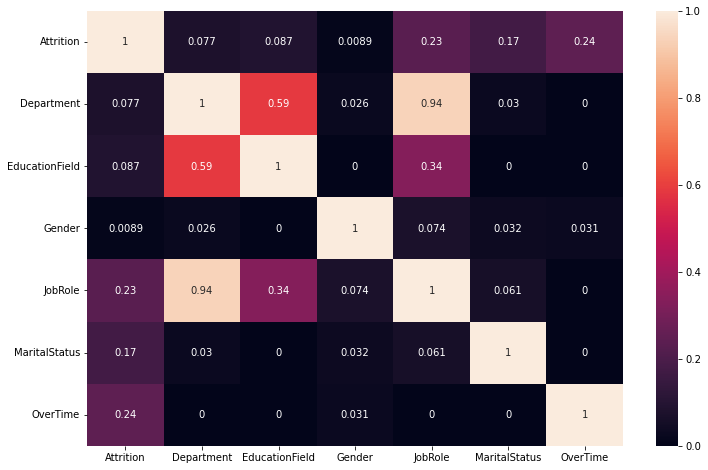

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_cat, annot = True)
plt.show()

> Melalui heatmap diatas yg kita gunakan menggunakan cramers'v, kita bisa lihat ada feature yang berkorelasi cukup kuat yaitu : **Department dengan JobRole**, lalu selanjutnya ada juga korelasi yg sedang yaitu : **Department dengan EducationField**, lalu untuk korelasi lainnya yg cukup rendah yaitu **JobRole dengan EducationField**.

> Selanjutnya saya akan menunjukkan hubungan antara features ini menggunakan pd.crosstab()

In [53]:
pd.crosstab(df_cat_new['Department'], df_cat_new['JobRole'], normalize = 'columns')

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Department,,,,,,,,,
Human Resources,0.0,1.0,0.0,0.107843,0.0,0.0,0.0,0.0,0.0
Research & Development,1.0,0.0,1.0,0.529412,1.0,1.0,1.0,0.0,0.0
Sales,0.0,0.0,0.0,0.362745,0.0,0.0,0.0,1.0,1.0


> Pada crosstab ( tabulasi silang) diatas bisa kita lihat bahwa:
> - JobRole Healthcare Representative 100% berada pada department Research & Development, begitu juga yg lainnya.
> - Yang berbeda hanyalah JobRole Manager yang terbagi bagi, 11% department Human Resources 53% Research & Development dan 36% berada di department Sales

In [54]:
pd.crosstab(df_cat_new['Department'], df_cat_new['EducationField'], normalize = 'columns')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,1.0,0.026403,0.0,0.028017,0.036585,0.030303
Research & Development,0.0,0.726073,0.0,0.782328,0.780488,0.712121
Sales,0.0,0.247525,1.0,0.189655,0.182927,0.257576


> Pada crosstab diatas bisa kita lihat bahwa:
> - Education Field Human Resources dan Marketing sajalah yang 100% berada di Department Human Resource dan Sales, dimana department tersebut sesuai dengan Bidang pembelajarannya.
> - Selanjutnya ada beberapa EducationField yang terbagi bagi kedalam Departmen lain seperti EducationField Life Sciences, Medical, Technical Degree, dan Other.

In [55]:
pd.crosstab(df_cat_new['JobRole'], df_cat_new['EducationField'], normalize = 'columns')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
JobRole,,,,,,
Healthcare Representative,0.000000,0.099010,0.000000,0.103448,0.109756,0.106061
Human Resources,0.777778,0.021452,0.000000,0.023707,0.036585,0.030303
Laboratory Technician,0.000000,0.196370,0.000000,0.213362,0.268293,0.143939
Manager,0.222222,0.066007,0.088050,0.068966,0.060976,0.037879
Manufacturing Director,0.000000,0.117162,0.000000,0.114224,0.085366,0.106061
Research Director,0.000000,0.059406,0.000000,0.075431,0.048780,0.037879
Research Scientist,0.000000,0.219472,0.000000,0.221983,0.207317,0.295455
Sales Executive,0.000000,0.176568,0.767296,0.140086,0.158537,0.143939
Sales Representative,0.000000,0.044554,0.144654,0.038793,0.024390,0.098485


> Langkah selanjutnya kita akan melakukan eksplorasi menyeluruh pada categorical features. Disini kolom Attrition akan kita drop karena merupakan target feature dan sudah tervisualisasi diawal tadi.

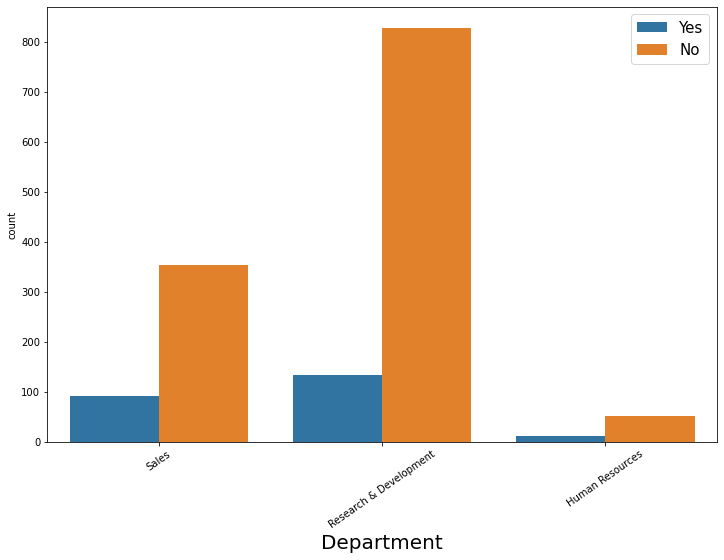

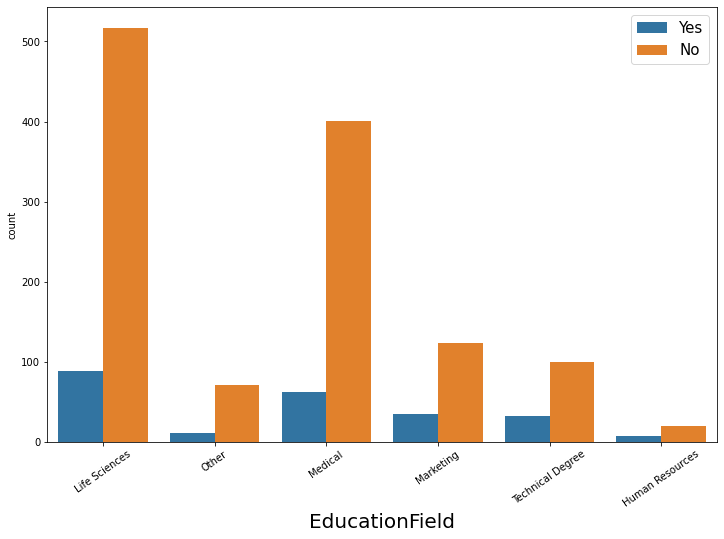

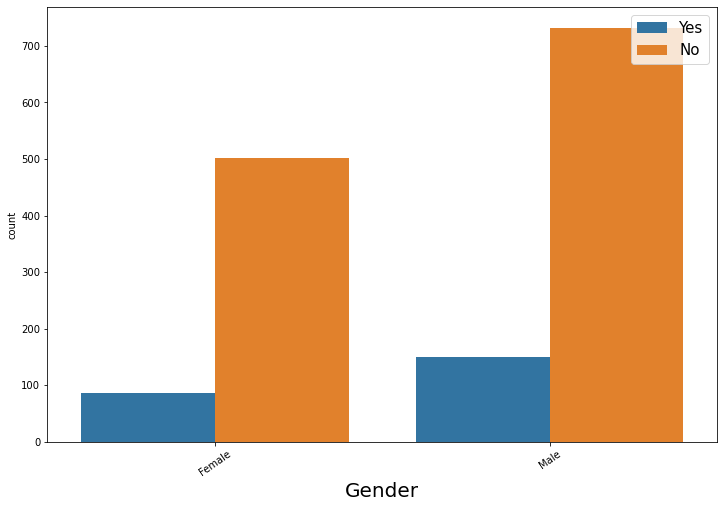

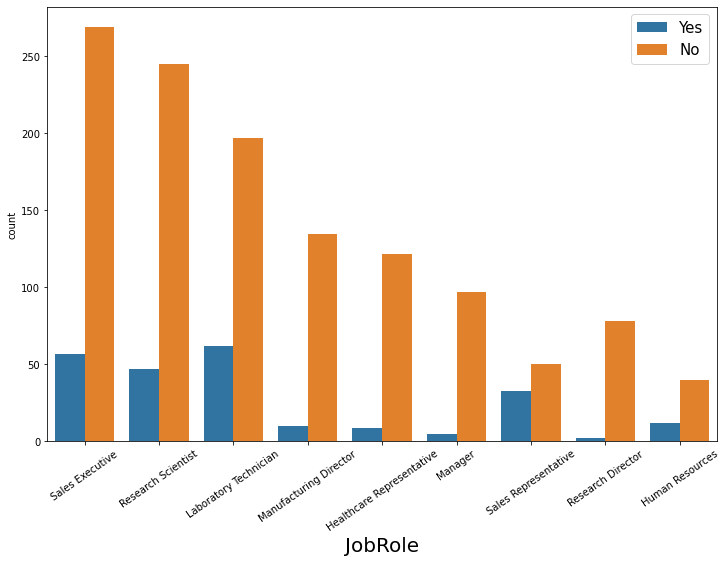

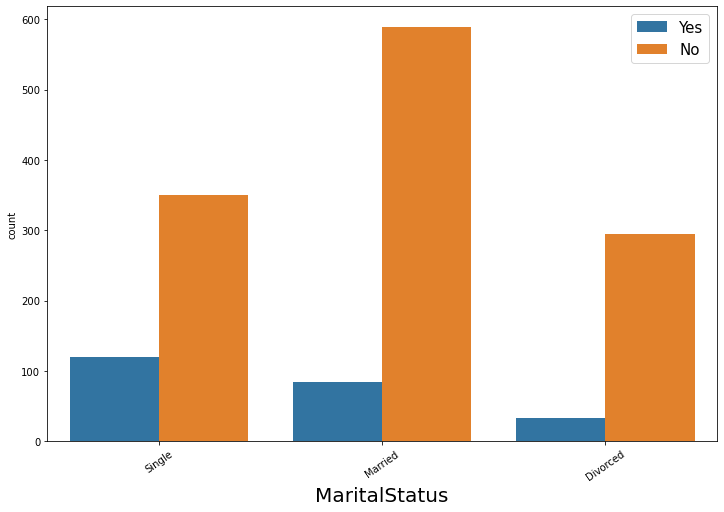

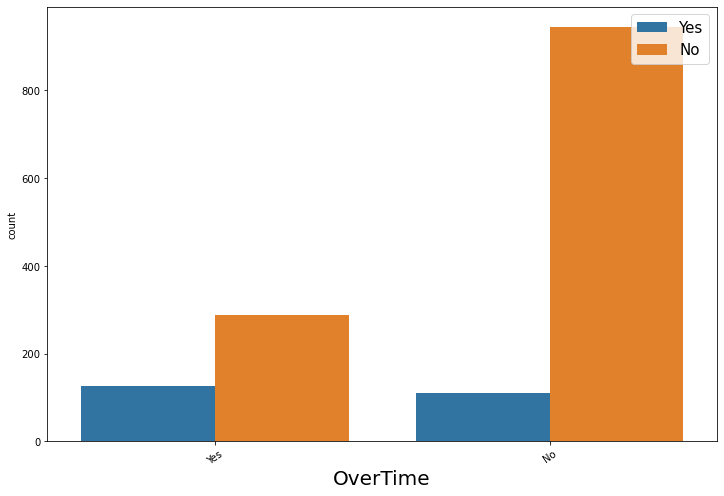

In [56]:
for i in df_cat_new.drop(columns = 'Attrition'):
    plt.figure(figsize = (12,8))
    ax = sns.countplot(x = i, data = df_new, hue = 'Attrition')
    plt.xlabel(i, fontsize = 20)
    plt.legend(loc='upper right', fontsize = 15)
    plt.xticks(rotation = 35)
    plt.tight_layout
    plt.show()

> Dari plot diatas bisa kita simpulkan :
> - Attrition terbanyak berada di department Research & Development dan Sales walaupun tidak ada perbedaan yg cukup signifikan dengan department lain. 
> - EducationField tertinggi nya berada di Life Sciences
> - Jenis kelamin Laki-laki
> - JobRole nya Laboratory Technician dan Sales Executive
> - Status pernikahan tertinggi di single, walau tidak ada perbedaan yg cukup signifikan juga.
> - OverTime tidak memiliki perbedaan yg cukup signifikan.

> Untuk informasi lebih lanjut ada dibawah ini.

In [57]:
# Department

df_cat_new.groupby('Attrition')['Department'].value_counts()

Attrition  Department            
No         Research & Development    828
           Sales                     354
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: Department, dtype: int64

In [58]:
# EducationField

df_cat_new.groupby('Attrition')['EducationField'].value_counts()

Attrition  EducationField  
No         Life Sciences       517
           Medical             401
           Marketing           124
           Technical Degree    100
           Other                71
           Human Resources      20
Yes        Life Sciences        89
           Medical              63
           Marketing            35
           Technical Degree     32
           Other                11
           Human Resources       7
Name: EducationField, dtype: int64

In [59]:
# Gender

df_cat_new.groupby('Attrition')['Gender'].value_counts()

Attrition  Gender
No         Male      732
           Female    501
Yes        Male      150
           Female     87
Name: Gender, dtype: int64

In [60]:
# JobRole

df_cat_new.groupby('Attrition')['JobRole'].value_counts()

Attrition  JobRole                  
No         Sales Executive              269
           Research Scientist           245
           Laboratory Technician        197
           Manufacturing Director       135
           Healthcare Representative    122
           Manager                       97
           Research Director             78
           Sales Representative          50
           Human Resources               40
Yes        Laboratory Technician         62
           Sales Executive               57
           Research Scientist            47
           Sales Representative          33
           Human Resources               12
           Manufacturing Director        10
           Healthcare Representative      9
           Manager                        5
           Research Director              2
Name: JobRole, dtype: int64

In [61]:
# MaritalStatus

df_cat_new.groupby('Attrition')['MaritalStatus'].value_counts()

Attrition  MaritalStatus
No         Married          589
           Single           350
           Divorced         294
Yes        Single           120
           Married           84
           Divorced          33
Name: MaritalStatus, dtype: int64

In [62]:
# OverTime

df_cat_new.groupby('Attrition')['OverTime'].value_counts()

Attrition  OverTime
No         No          944
           Yes         289
Yes        Yes         127
           No          110
Name: OverTime, dtype: int64

## SUMMARY

> Melalui eksplorasi data yg telah kita lakukan, selanjutnya kita dapat menarik kesimpulan bahwa <br>
Karyawan yg akan terkena Attrition ialah karyawan yg :

> Numerical :
> - berumur sekitar 26 - 33 tahun
> - kebanyakan memiliki performanceRating 3 (Excellent)

> Categorical :
> - mereka kebanyakan berada di department Research & Development dan Sales walaupun tidak ada perbedaan yg cukup signifikan dengan department lain. 
> - memiliki EducationField tertinggi di Life Science
> - berjenis kelamin laki-laki
> - memiliki JobRole Laboratory Technician dan Sales Executive
> - dan status pernikahan tertinggi di single, walau tidak ada perbedaan yg cukup signifikan juga.<br><br>
Untuk data di kelompok data categorical ini sepertinya terlihat belum cukup signifikan perbedaannya.

> Selanjutnya, data yang sudah bersih akan saya letakkan dibawah

In [63]:
df_clean = pd.concat([df_con_new, df_cat_new], axis = 1)

In [64]:
df_clean.head()

,Age,DistanceFromHome,Education,MonthlyIncome,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsInCurrentRole,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1,2,5993,4,3,1,4,Yes,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,49,8,1,5130,2,4,3,7,No,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,37,2,2,2090,3,3,3,0,Yes,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,33,3,4,2909,3,3,3,7,No,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,27,2,1,3468,2,3,3,2,No,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [65]:
df_clean.to_csv('HR-Employee-Attrition_clean.csv', index = False)